For this practical work,have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [ ]:
 
data1 = pd.read_csv("/content/sample_data/RegData.csv" , header=None , names=['X','Y'])

data1.head()


,X,Y
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9


#### Explore your data

In [ ]:
print('Describe Date ')
print(data1.describe())
print('\n info data')

print(data1.info())

Describe Date 
               X          Y
count  13.000000  13.000000
mean    5.953846   5.569231
std     1.714942   1.314271
min     2.900000   4.000000
25%     4.900000   4.400000
50%     6.000000   5.200000
75%     6.700000   6.100000
max     9.800000   7.900000

 info data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       13 non-null     float64
 1   Y       13 non-null     float64
dtypes: float64(2)
memory usage: 336.0 bytes
None


#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [ ]:
col= data1.shape[1]  # get number of columns of data 
x_data = data1.iloc[:,0:col-1]


In [ ]:
x_data.shape

(13, 1)

In [ ]:
# adding a new column called ones before the data 
'''
 Add this column to multiply by the value of the error value part of theta 0 
  theta 0 := theta0 - alpha * (Hypothesis)/m
      Multiplying this column by the first col of matrix (1's) will not be affected
      
'''

data1.insert(0, 'Ones', 1)
data1.head()

,Ones,X,Y
0,1,2.9,4.0
1,1,6.7,7.4
2,1,4.9,5.0
3,1,7.9,7.2
4,1,9.8,7.9


In [ ]:

# separate X ( independant data) from y (target variable or dependant data)
cols= data1.shape[1]  # get number of columns of data 

x = data1.iloc[:,0:cols-1]
y = data1.iloc[:,cols-1:cols]

x.head()


,Ones,X
0,1,2.9
1,1,6.7
2,1,4.9
3,1,7.9
4,1,9.8


In [ ]:
y.head()


,Y
0,4.0
1,7.4
2,5.0
3,7.2
4,7.9


#### Explore your data

#### Plot the original data (scatter plot of X,y)

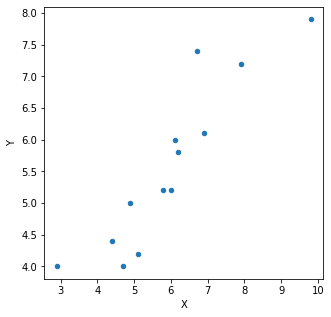

In [ ]:
data1.plot(kind='scatter', x='X', y='Y', figsize=(5,5))


## LR Full Implementation

* linear regression basically used for establishing a relationship between two variable

* the equation of the line in a 2D plane is given by y = m x + c where m is the slope of the line and c is the constant. Basically,
* what linear regression does is it found the best value of m and c which will best fit the data points. 
* Basically it will guess some random value of m then check how incorrect it was and then manually adjust itself to become slightly more accurate. During Linear regression, this process is repeated constantly.


* y = theta0 + theta1 *x1 

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

![image.png](attachment:image.png)

In [ ]:
# in vector implementation 
theta =np.matrix( np.array([0,0]))
alpha = 0.01
print("theta" , theta )
print("theta" , theta.shape)


theta [[0 0]]
theta (1, 2)


In [ ]:
#convert x , y data frames to metrices
x=  np.matrix(x.values)
y = np.matrix (y.values)

In [ ]:

print('X.shape = ' , x.shape)
print('theta.shape = ' , theta.shape)
print('y.shape = ' , y.shape)

X.shape =  (13, 2)
theta.shape =  (1, 2)
y.shape =  (13, 1)


In [ ]:
x.T.shape

(2, 13)

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.![image.png](attachment:image.png)
#### Note: you will need to iterate through all data points

In [ ]:
#y_pred = x * theta.T
y_pred = x @ theta.T


print(y_pred.shape)

(13, 1)


In [ ]:
theta.shape

(1, 2)

### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)

In [ ]:
def compute_cost(x,y,theta):
#     print("theta " , theta)
#     print("cost val",(np.sum(  np.power( ( (x @ theta.T) - y ), 2 )  ))  / (2*len(x)) )
    return ((np.sum(  np.power( ( (x @ theta.T) - y ), 2 )  ))  / (2*len(x)) )
  

print('Calculate the Cost fun in  case of values of theta is 0')

print( compute_cost(x, y, theta))

    

Calculate the Cost fun in  case of values of theta is 0
16.305384479692318


### Step4: Calculate the gradient.![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)

### Step5: Update the parameters (simultaneously).![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)

In [ ]:
def copmute_gradient(x,y,alpha,iterations,theta):
    cost_list = np.zeros(iterations+1)
    cost_list [0] = compute_cost(x, y, theta) 
    #list_theta=[np.zeros(theta.shape)]
    list_theta = np.array([[0,0]])
#     print(list_theta)
    for i in range (iterations) : 
        gradient_error =  (x * theta.T ) - y 
       # print(gradient_error.shape)
    # iterate on parameters (theta 0 , theta 1)\
#         print(theta)
        for j in range(theta.shape[1]):
#             print(theta.shape)
            deriv =  np.multiply ( gradient_error , x[: , j] )

            sum_part = (np.sum(deriv) * (alpha /len(x) ))   #  about the term of -lr * summ((ypred-y))/m     
            theta_values[0,j] = theta_values[0,j] - ( (alpha /len(x)) * np.sum(deriv))    
        theta = theta_values
        list_theta = np.append(list_theta , theta.reshape(1,-1), axis=0 )
#         print("theata" ,theta)
#         print("list_theta",np.array(list_theta).reshape(-1,2))
#         print( compute_cost(x, y, theta))

        cost_list[i+1] = compute_cost(x, y, theta)
    return theta, cost_list ,np.array(list_theta).reshape(-1,2)  
     


In [ ]:
# initialize variables for learning rate and iterations
alpha = 0.003
iterations = 100

theta =np.array([0,0]).reshape(1,2)

theta_values = np.zeros(theta.shape).reshape(1,2)

# perform gradient descent to "fit" the model parameters

theta, cost_list , list_theta  = copmute_gradient(x,y,alpha,iterations,theta)

print('g = ' , theta)


print('cost list  = ' ,cost_list[0:50] )

#print(list_theta.reshape(-1,2))

print(cost_list.shape)


g =  [[0.16684051 0.89259374]]
cost list  =  [16.30538448 12.74962097  9.97898944  7.82012726  6.13795148  4.82720641
  3.80587756  3.01005981  2.38995872  1.90677484  1.53027589  1.23690509
  1.00830718  0.83017983  0.69137881  0.58322059  0.49893902  0.43326197
  0.38208145  0.34219651  0.31111302  0.28688756  0.26800582  0.25328789
  0.24181436  0.23286885  0.22589315  0.22045233  0.21620747  0.21289449
  0.21030764  0.20828659  0.20670639  0.20546972  0.20450071  0.20374028
  0.20314236  0.20267108  0.20229847  0.20200276  0.20176695  0.20157784
  0.2014251   0.20130072  0.20119842  0.20111334  0.20104168  0.20098048
  0.20092742  0.20088072]
(101,)


### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.![image.png](attachment:image.png)

In [ ]:
print(list_theta.shape)


(101, 2)


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [ ]:
# get prediction on training data
prdection_single = theta[0, 0] + (theta[0, 1] * x[:,1])      
# print(y.shape)
# print(x_data.shape)
# print(prdection_single.shape)


In [ ]:
list_theta.shape

(101, 2)

In [ ]:
x_data.shape

(13, 1)

#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

Text(0, 0.5, 'Y')

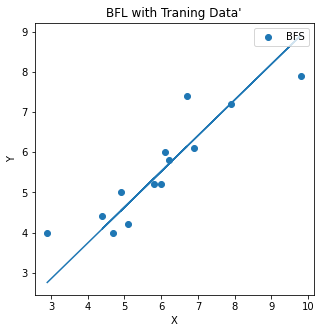

In [ ]:

# draw the Best Fiting line 

import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(5,5))
plt.plot ( x_data , prdection_single )
ax.scatter(data1.X, data1.Y, label='BFS' )
plt.title("BFL with Traning Data'")
ax.legend(loc=1)

ax.set_xlabel('X')

ax.set_ylabel('Y')


In [ ]:
#Divide the x values by 100 numbers in order

x_test = np.linspace(x[:,1].min(), x[:,1].max(), 50)
print(x_test)

[2.9000001  3.04081642 3.18163275 3.32244908 3.46326541 3.60408174
 3.74489807 3.88571439 4.02653072 4.16734705 4.30816338 4.44897971
 4.58979604 4.73061237 4.87142869 5.01224502 5.15306135 5.29387768
 5.43469401 5.57551034 5.71632666 5.85714299 5.99795932 6.13877565
 6.27959198 6.42040831 6.56122464 6.70204096 6.84285729 6.98367362
 7.12448995 7.26530628 7.40612261 7.54693894 7.68775526 7.82857159
 7.96938792 8.11020425 8.25102058 8.39183691 8.53265323 8.67346956
 8.81428589 8.95510222 9.09591855 9.23673488 9.37755121 9.51836753
 9.65918386 9.80000019]


In [ ]:

# y_test = np.linspace(y.min(), y.max(), 50)
# print(y_test)

In [ ]:
# x_test= x_test.reshape(50,1)
# prdection2=x_test @ theta
# prdection2.shape


Text(0, 0.5, 'Y')

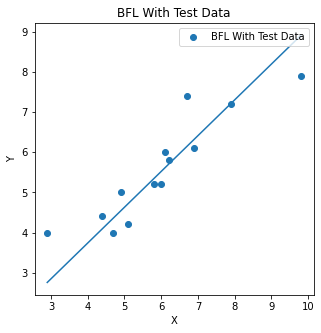

In [ ]:

prdection2 = theta[0, 0] + (theta[0, 1] * x_test)
prdection2 = np.reshape(prdection2,(50,1))

import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(5,5))
plt.plot ( x_test , prdection2 )
ax.scatter(data1.X, data1.Y, label='BFL With Test Data')
ax.legend(loc=1)
plt.title("BFL With Test Data")

ax.set_xlabel('X')

ax.set_ylabel('Y')


Text(0, 0.5, 'Y')

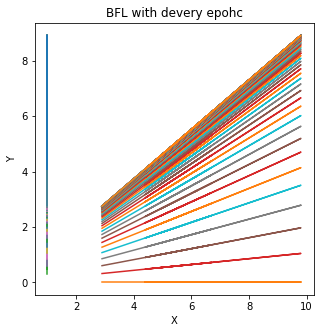

In [ ]:

# draw the line

import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(5,5))
for theta in  list_theta :
#     print(theta,theta.shape)
    theta=theta.reshape(1,-1)
#     print(theta,theta.shape)
#     p= t[0, 0] + (t[0, 1] * x[:,1])
    ax.plot(x,( (x @ theta.T) ) , label='BFL')
    plt.title("BFL with devery epohc")

#     break
    

#ax.legend(loc=1)

ax.set_xlabel('X')

ax.set_ylabel('Y')


### Plot loss vs. iterations

Text(0.5, 1.0, 'Error vs. Training Epoch\\iteration.')

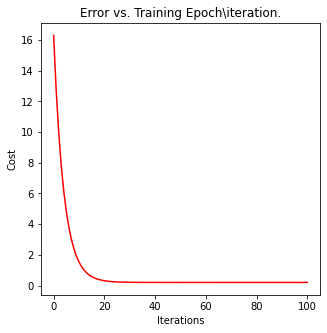

In [ ]:
# draw error graph

fig, ax = plt.subplots(figsize=(5,5))
ax.plot( cost_list, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch\iteration.')


####  Theta with iterations 


In [ ]:
theta_0 = list_theta[: , 0].reshape(iterations+1,1)
theta_1 = list_theta[: , 1].reshape(iterations+1,1)

In [ ]:

print(theta_0.shape)
print(theta_1.shape)

(101, 1)
(101, 1)


In [ ]:
# theta_0


Text(0.5, 1.0, 'Error vs. Training Epoch\\iteration.')

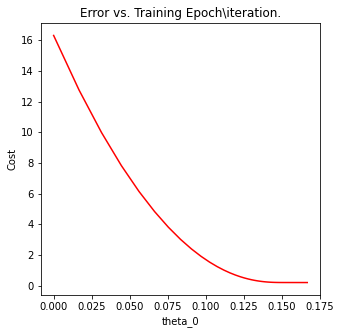

In [ ]:
# draw error graph

fig, ax = plt.subplots(figsize=(5,5))
ax.plot( theta_0,cost_list ,  'r')
ax.set_xlabel('theta_0')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch\iteration.')


Text(0.5, 1.0, 'Error vs. Training Epoch\\iteration.')

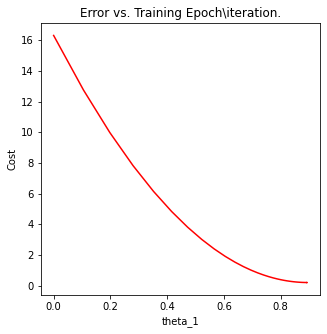

In [ ]:
# draw error graph

fig, ax = plt.subplots(figsize=(5,5))
ax.plot( theta_1, cost_list ,  'r')
ax.set_xlabel('theta_1')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch\iteration.')


#### Use R2 score to evaluate LR equation output
![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)
![image-3.png](attachment:image-3.png)
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [ ]:
prdection = theta[0, 0] + (theta[0, 1] * x[:,1])


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y,prdection))

0.7496613082813561


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


### Repeat implementation but for more than one variable

# Multivariate LR

## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path = '/content/sample_data/MultipleLR.csv'
data = pd.read_csv(path, header=None, names=['x1', 'x2','x3','y'])
data.head()

,x1,x2,x3,y
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [ ]:
# firstly separte x , y 
cols = data.shape[1]

x_data2 = data.iloc[: , 0:cols-1]


print(cols)
X = data.iloc[: , 0:cols-1]
Y = data.iloc[: , cols-1:cols]
X.insert(0, 'Ones', 1)


4


In [ ]:
print(X.head())
print(Y.head())

   Ones  x1  x2   x3
0     1  73  80   75
1     1  93  88   93
2     1  89  91   90
3     1  96  98  100
4     1  73  66   70
     y
0  152
1  185
2  180
3  196
4  142


In [ ]:
X=  np.matrix(X.values)
Y = np.matrix (Y.values)
print('X.shape = ' , X.shape)
# print('theta.shape = ' , theta.shape)
print('y.shape = ' , Y.shape)

X.shape =  (25, 4)
y.shape =  (25, 1)


In [ ]:
thetamul = np.matrix(np.zeros(4).reshape(1,4))
def computeCost(theta , x , y ):
    m=len(x)
    h= np.dot(x, theta.T)
    return 1/(2*m) * sum(np.square(h-y))
computeCost(thetamul,X,Y)
# print(x.shape)
# print(y.shape)
# print(theta.shape)

    

matrix([[13405.98]])

In [ ]:
#Now buliding multivariable regression using Gd 
def MultiVarGD__(x,y,alpha,iteration):
    #0- preparing 
 
    # add x0 with ones to theta 0 
    # add new col with ones to x data 
    #number of cols -- features
    n = x.shape[1] 
    #number of rows -- observations
    m = x.shape[0]
    # intialize theta 
    stp=iteration
    theta =  np.matrix(np.zeros(n).reshape(1,n))
    #theta list to store theta values 
    list_theta =np.zeros(n*iteration).reshape(iteration , n )
#     theta_values = np.matrix(np.zeros(theta.shape))

    #1- need to compute hypothesis
    y_pred = x @ theta.T
    #2- comoute cost function -- make cost list to store all costs 
    cost_list = np.zeros(iteration)
    for i in range(iteration):
        gradient_error =  (x @ theta.T ) - y 
        gradient_error= np.dot(gradient_error.T , x )
        
        theta = theta - ( (alpha /m) * gradient_error )
        list_theta[i]= theta
#       cost_list[i+1] =computeCost(x,y,theta)
        h= np.dot(x, theta.T)
        cost_list[i]=  1/(2*m) * sum(np.square(h-y))
        if(abs( cost_list[i] - cost_list[i-1]) <= 0.1):
            stp=i
            break
    return   cost_list[0:stp].reshape(stp , 1) , theta , list_theta[0:stp]
        
        

In [ ]:
alpha = 0.000005
iterations =100
# Calculating theta and cost
cost_list , theta , list_theta = MultiVarGD__(X, Y, alpha, iterations)


In [ ]:
# print("Final theta is : ",theta)
# print("theta values are :" , list_theta)
# print(theta.shape)
# print("cost values are :" , cost_list)
# # print(cost_list.shape)
print("final cost is :",cost_list[-1])
# 

final cost is : [6.29678068]


In [ ]:
prdection_multi  = X @ theta.T

print(y.shape)

print(x_data.shape)


(13, 1)
(13, 1)


#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

### Plot loss vs. iterations

Text(0.5, 1.0, 'Error vs. Training Epoch\\iteration.')

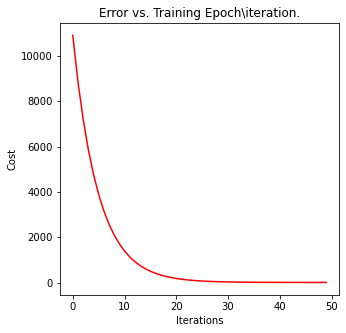

In [ ]:
# draw error graph

fig, ax = plt.subplots(figsize=(5,5))
ax.plot( cost_list, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch\iteration.')


In [ ]:
theta0 = list_theta[: , 0].reshape(-1,1)
theta1 = list_theta[: , 1].reshape(-1,1)
print(theta0.shape)
print(theta1.shape)

(50, 1)
(50, 1)


Text(0.5, 1.0, 'cost function wit theta 1.')

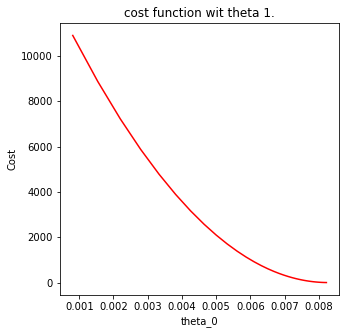

In [ ]:
# draw error graph

fig, ax = plt.subplots(figsize=(5,5))
ax.plot( theta0,cost_list ,  'r')
ax.set_xlabel('theta_0')
ax.set_ylabel('Cost')
ax.set_title('cost function wit theta 1.')


Text(0.5, 1.0, 'cost function wit theta 1.')

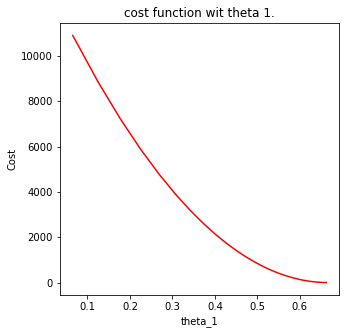

In [ ]:
# draw error graph

fig, ax = plt.subplots(figsize=(5,5))
ax.plot( theta1, cost_list ,  'r')
ax.set_xlabel('theta_1')
ax.set_ylabel('Cost')
ax.set_title('cost function wit theta 1.')


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(Y,prdection_multi))

0.9776096872671454


# Using SKlearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

In [ ]:
from sklearn.linear_model import LinearRegression


#### Train the model (fit the model to the training data)

In [ ]:
reg = LinearRegression().fit(x, y)


In [ ]:
predict = reg.predict(x)
x_data.shape

(13, 1)

#### Predict y values using the trained model

#### Plot model output (fitted line) with the original data (scatter plot of X,y)

Text(0, 0.5, 'Y')

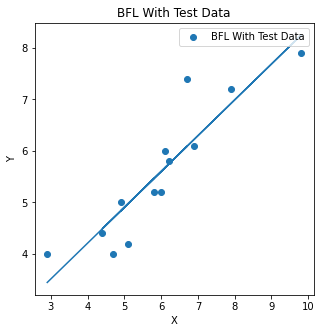

In [ ]:

import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(5,5))
plt.plot ( x_data, predict )
ax.scatter(data1.X, data1.Y, label='BFL With Test Data')
ax.legend(loc=1)
plt.title("BFL With Test Data")

ax.set_xlabel('X')

ax.set_ylabel('Y')


#### Use R2 score to evaluate model output

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y,predict))

0.8213156778363777


### Repeat for Mulivariate

In [ ]:
reg_multi = LinearRegression().fit(X, Y)
predictmulti = reg_multi.predict(X)


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(Y,predictmulti))

0.9896615789448399
